

**Akshvir Brar**






In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from queue import PriorityQueue
import geopy.distance
import PIL.Image 


In [ ]:

basePath = "/content/drive/MyDrive/Colab Notebooks/Artificial Intelligence/Data/"
map = "texas-map.png"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

path = "/content/drive/MyDrive/Colab Notebooks/Artificial Intelligence/Data/" 
df_cit = pd.read_csv(path+"cities.csv")
df_dist = pd.read_csv(path+"distances.csv",names=["city1","city2","dist"])


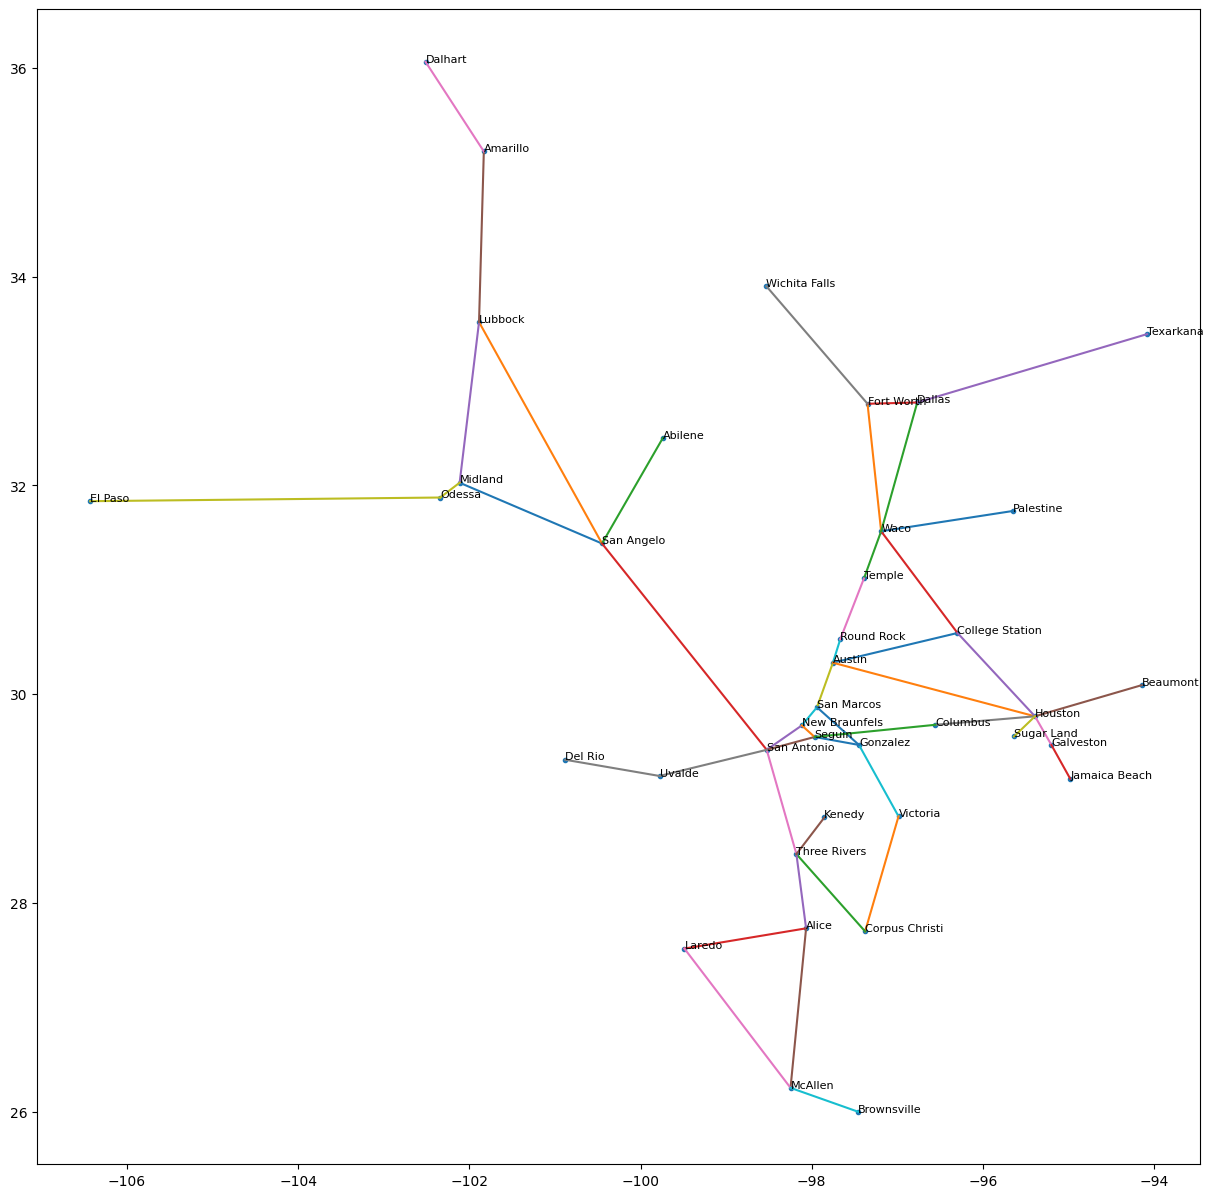

In [ ]:

fig, ax = plt.subplots()
fig.set_size_inches((15,15))

plt.scatter(df_cit['lat'],df_cit['long'],marker=".")

for i, row in df_cit.iterrows():
  ax.annotate(row.city,(row.lat,row.long),fontsize =8 ,color = 'black')

for index,row in df_dist.iterrows():
  a = df_cit[ df_cit.city == row.city1 ] 
  b = df_cit[ df_cit.city == row.city2 ] 
  plt.plot((a.lat, b.lat), (a.long, b.long))


#Uninformed Search Agent



In [ ]:

class Node:
  def __init__(self, state, parent, dist_to_par, cost):
    self.state=state
    self.parent=parent
    self.dist_to_par = dist_to_par
    self.path_cost=cost

def f_uc(node, goal, df_cit):
  return node.path_cost

def best_first_search(df_cit, df_dist, initial, goal, f):
  node = Node(initial, None, 0, 0)
  frontier = PriorityQueue()
  frontier.put((f(node, goal, df_cit), node)) #priority & value pair
  reached = {}
  reached[initial] = node
  explored = []
  dist_trav = 0
  while not frontier.empty():
    node = frontier.get()[1]

    explored.append(node)
    dist_trav = dist_trav + node.dist_to_par
    if(node.state == goal):
      return (explored, node)

    for child in expand(df_cit, df_dist, node):

      s = child.state
      if(s not in reached):
        reached[s] = child
        frontier.put((f(child, goal, df_cit), child))
      if(goal != False and child.path_cost < reached[s].path_cost):
        reached[s] = child
        frontier.put((f(child, goal, df_cit), child))

  if(goal):
    return False
  else:
    return (dist_trav, explored)

def expand(df_cit, df_dist, node):
  s = node.state

  neighbors1 = df_dist[df_dist.city2 == s][["city1", "dist"]]
  neighbors2 = df_dist[df_dist.city1 == s][["city2", "dist"]]
  neighbors1 = neighbors1.rename(columns={"city1":"city"})
  neighbors2 = neighbors2.rename(columns={"city2":"city"})
  neighbors = pd.concat([neighbors1, neighbors2])

  for index, row in neighbors.iterrows():
    c = row.city
    dist = row.dist
    cost = node.path_cost + dist
    yield Node(c, node, dist, cost)


end = best_first_search(df_cit, df_dist, "Three Rivers", False, f_uc)


dist_tr = end[0]
visited = end[1]
i = 0
print("Total distance travelled: ", dist_tr)
print("Order of visit: ")

print('{:<12}  {:<22}'.format("Step", "Town"))
for el in visited:

  print('{:<12}  {:<22}'.format(i, el.state))
  i = i + 1


Total distance travelled:  3385.8271101900004
Order of visit: 
Step          Town                  
0             Three Rivers          
1             Kenedy                
2             Alice                 
3             San Antonio           
4             Corpus Christi        
5             New Braunfels         
6             Seguin                
7             San Marcos            
8             Gonzalez              
9             Laredo                
10            Austin                
11            Uvalde                
12            McAllen               
13            Victoria              
14            Round Rock            
15            Columbus              
16            Temple                
17            Brownsville           
18            Del Rio               
19            Waco                  
20            College Station       
21            San Angelo            
22            Houston               
23            Dallas                
24          

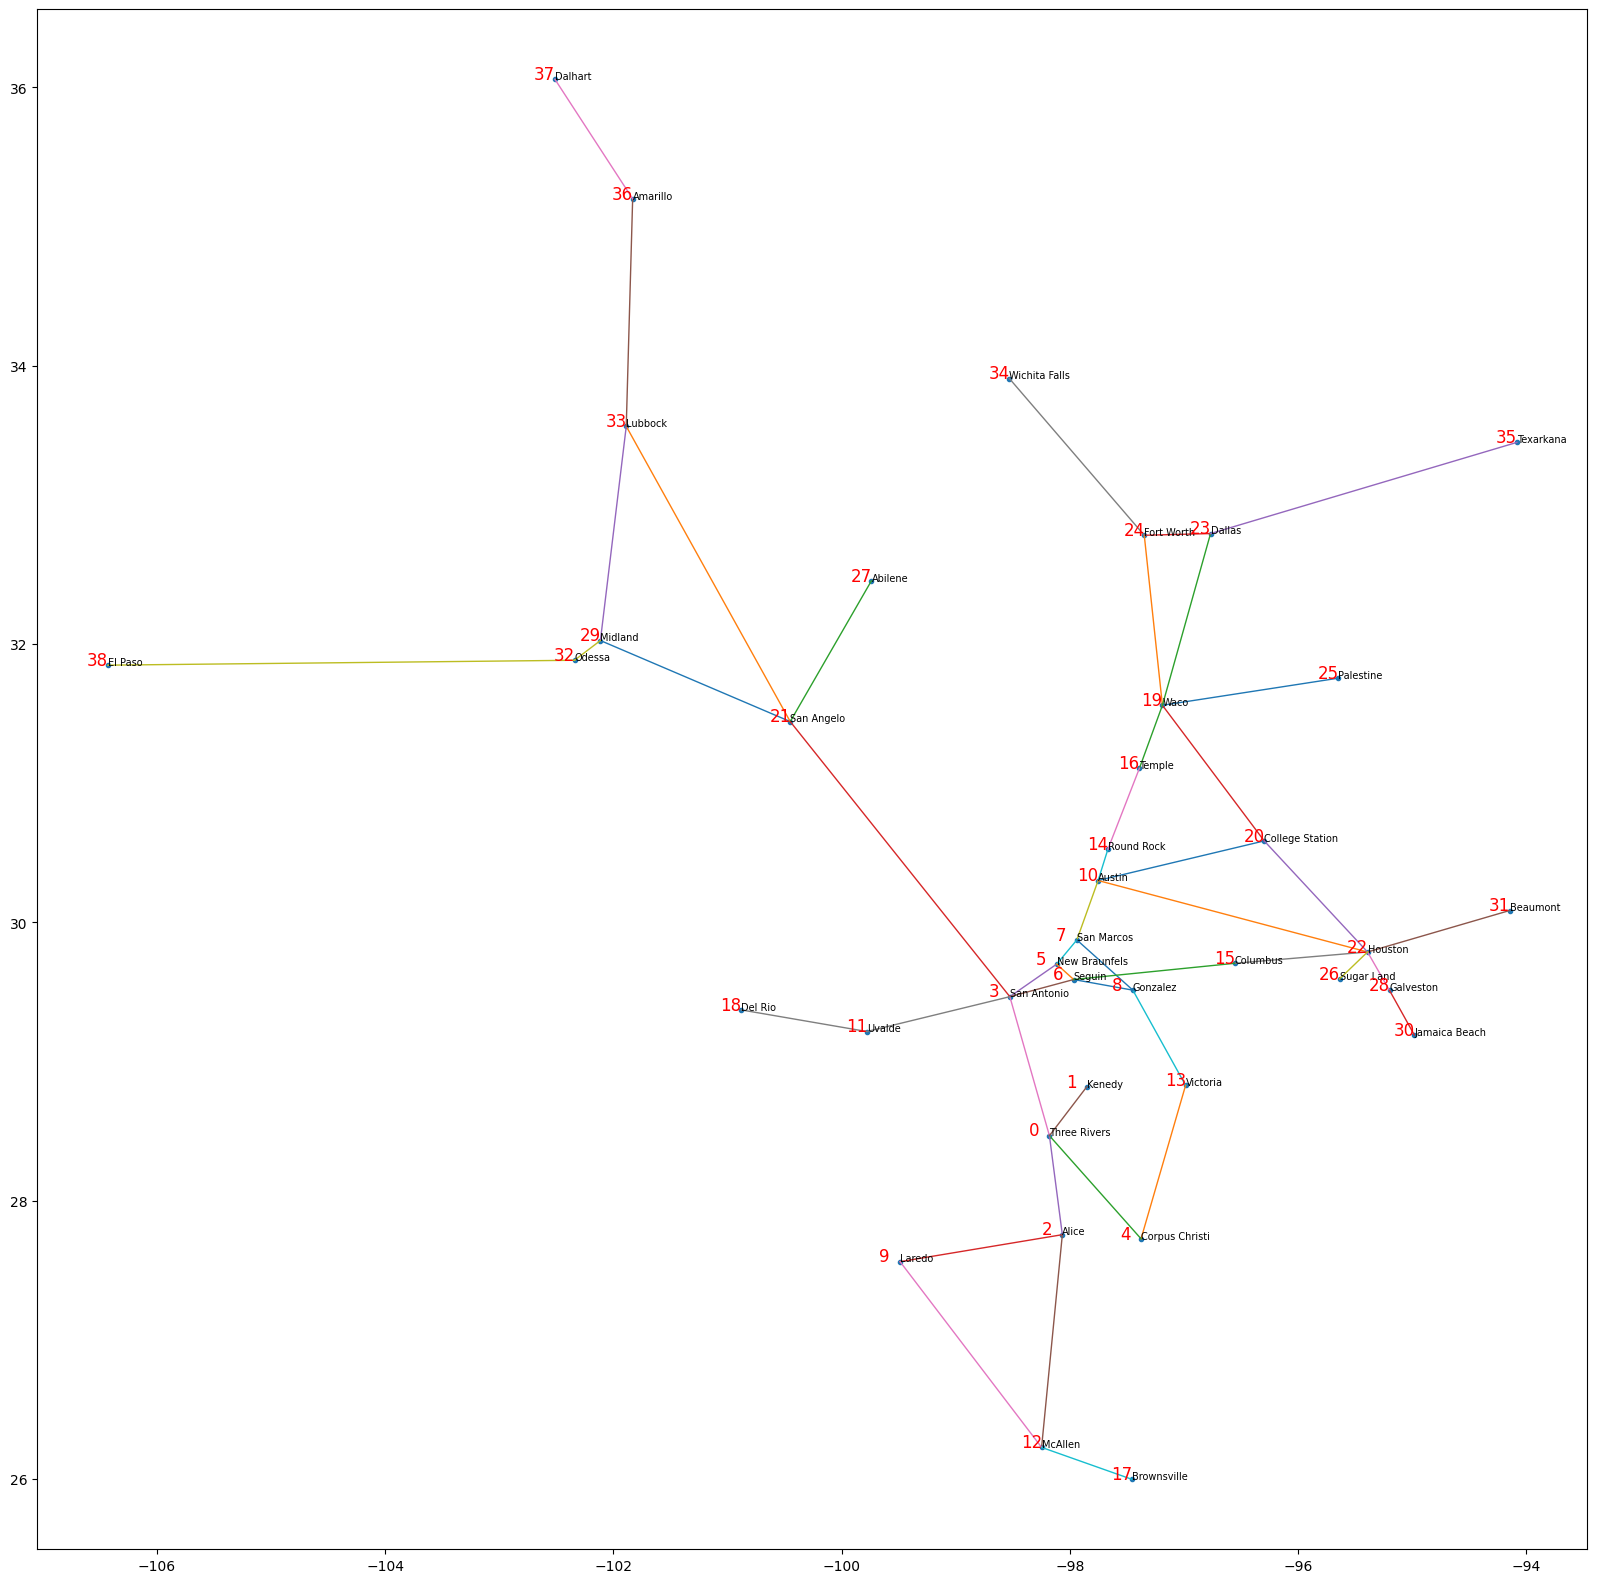

In [ ]:
# 2D map
# 2D map
fig, ax = plt.subplots()
fig.set_size_inches((20,20))

plt.scatter(df_cit['lat'],df_cit['long'],marker=".")

for i, row in df_cit.iterrows():
  ax.annotate(row.city,(row.lat,row.long), fontsize =7 ,color = 'black')

for index,row in df_dist.iterrows():
  a = df_cit[ df_cit.city == row.city1 ] 
  b = df_cit[ df_cit.city == row.city2 ] 
  plt.plot((a.lat, b.lat), (a.long, b.long), linewidth=1)

for i in range(len(visited)):
  row = df_cit[ df_cit.city == visited[i].state ] 
  ax.annotate(i,(row.lat,row.long),fontsize =12 ,color = 'red', textcoords="offset points", xytext=(-15,0))

#  - Informed Search Agent



 implementing an **optimal** informed search strategy.

*   The path / sequence of cities that will be visited in the optimal vaccine transportation strategy.
*   The total distance travelled in the optimal vaccine transportation strategy.


the cities visited.

In [ ]:

def dist_sq(a, b):
  return (((a[0]-b[0])*30)**2+((a[1]-b[1])*30)**2)**(1/2)

def f_Ast(node, goal, df_cit):
  return node.path_cost + heuristic(node.state, goal, df_cit)

def f_greedy(node, goal, df_cit):
  return heuristic(node.state, goal, df_cit)

def heuristic(state, goal, df_cit):


  long = float ( df_cit[df_cit.city == state].long )
  lat = float ( df_cit[df_cit.city == state].lat )
  stateCoord = ( long, lat )  
  long = float ( df_cit[df_cit.city == goal].long )
  lat = float ( df_cit[df_cit.city == goal].lat )
  goalCoord = ( long, lat )  
  return dist_sq(stateCoord, goalCoord)

(visited, end) = best_first_search(df_cit, df_dist, "San Antonio", "College Station", f_Ast)


end.path_cost
n = end
i = 0
reverse = []
while(n != None):
  reverse.append(n)
  n = n.parent
n = len(reverse)
print("Order of visit")
print("{:<12}  {:<22}".format("Step", "Town"))
for i in range(len(visited)):
  print("{:<12}  {:<22}".format(i, visited[i].state))
print("\n")
print("Total distance travelled = ", reverse[0].path_cost)
print("Vaccination distribution Path:")

print("{:<12}  {:<22}".format("Step", "Town"))
for i in range(n):

  print("{:<12}  {:<22}".format(i, reverse[n-1-i].state))

Order of visit
Step          Town                  
0             San Antonio           
1             New Braunfels         
2             Seguin                
3             San Marcos            
4             Gonzalez              
5             Austin                
6             Round Rock            
7             Columbus              
8             Three Rivers          
9             Kenedy                
10            Victoria              
11            Temple                
12            College Station       


Total distance travelled =  186.77450141
Vaccination distribution Path:
Step          Town                  
0             San Antonio           
1             New Braunfels         
2             San Marcos            
3             Austin                
4             College Station       


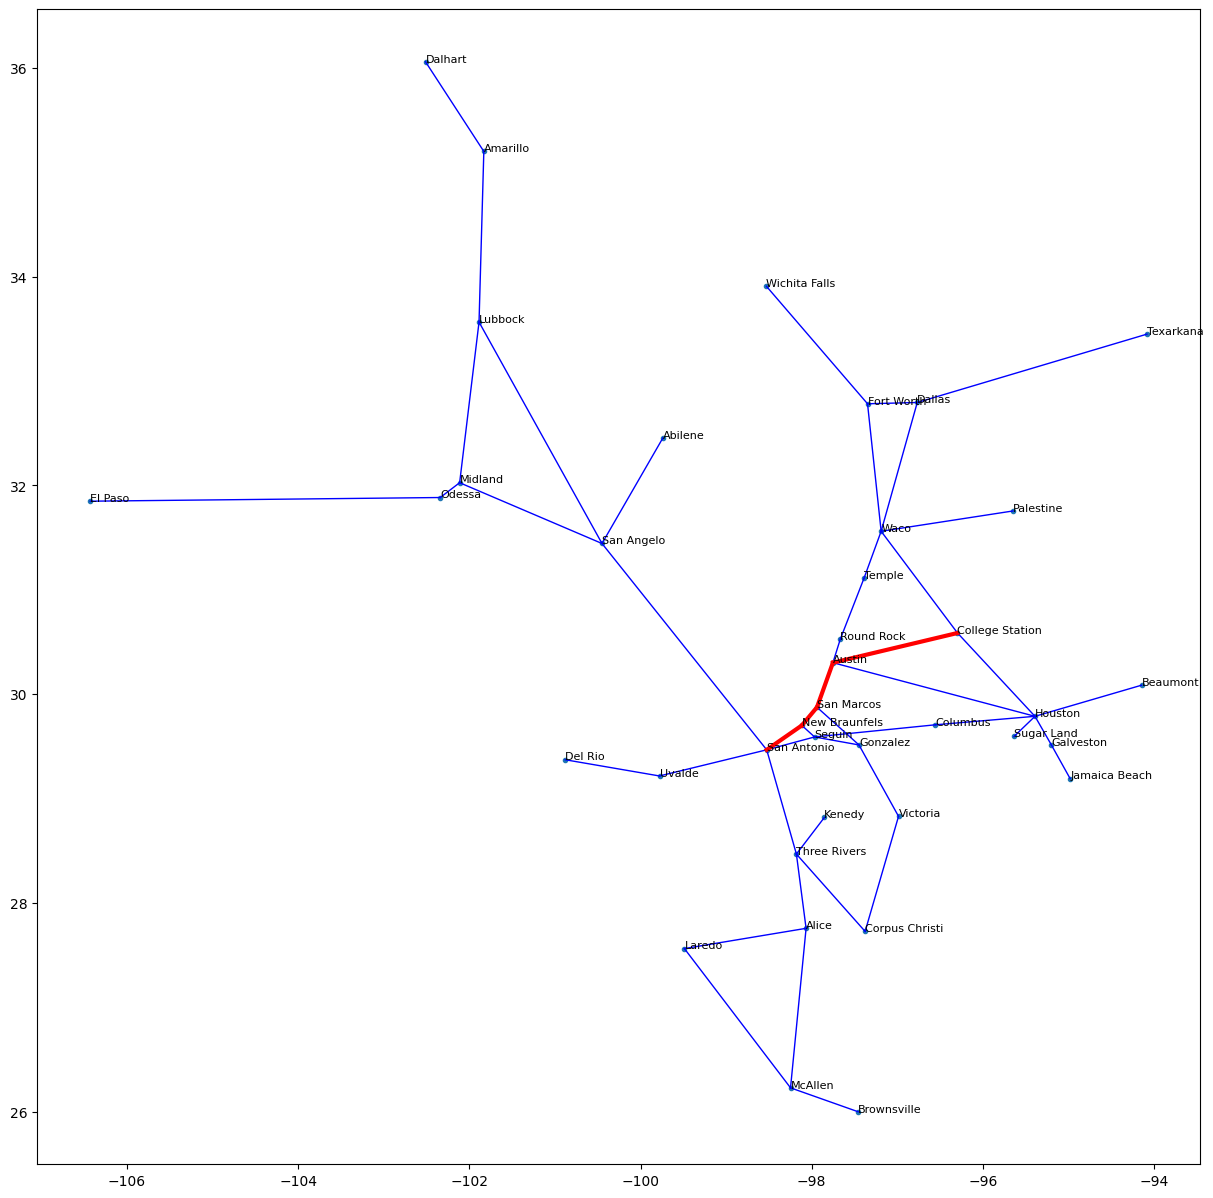

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches((15,15))

plt.scatter(df_cit['lat'],df_cit['long'],marker=".")

for i, row in df_cit.iterrows():
  ax.annotate(row.city,(row.lat,row.long),fontsize =8 ,color = 'black')

for index,row in df_dist.iterrows():
  a = df_cit[ df_cit.city == row.city1 ] 
  b = df_cit[ df_cit.city == row.city2 ] 
  plt.plot((a.lat, b.lat), (a.long, b.long), color="blue", linewidth=1)

for i in range(n-1, 0, -1):
  a = df_cit[ df_cit.city == reverse[i].state ] 
  b = df_cit[ df_cit.city == reverse[i-1].state ]
  plt.plot((a.lat, b.lat), (a.long, b.long), color="red", linewidth=3)

d